In [1]:
from shapely.geometry import LineString
from shapely.geometry import LinearRing
from shapely.geometry import Polygon
from shapely.geometry import Point


#shape = LinearRing([(0, 0), (0, 1), (1, 1), (1, 0)])
shape1 = Polygon([(0, 0), (0, 4), (4, 4), (4, 0), (0, 0)])
shape2 = Polygon([(2, 2), (2, 6), (6, 6), (6, 2), (2, 2)])

x = shape1.intersection(shape2)

x.bounds

(2.0, 2.0, 4.0, 4.0)

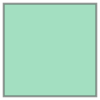

In [2]:
shape1

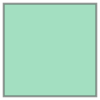

In [3]:
shape2

In [4]:
x = 0 + 2
print(x)

2


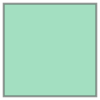

In [5]:
shape_mini_square = Polygon([(3,3), (3, 5), (5, 5), (5, 3), (3, 3)])
shape_mini_square

In [6]:
# radius of the shaped circle is very important !!!
shape_circle = Point(4.4,4.4).buffer(10)
print(shape_circle)

POLYGON ((14.4 4.4, 14.35184726672197 3.419828596704395, 14.20785280403231 2.44909677983872, 13.96940335732209 1.497153227455379, 13.63879532511287 0.5731656763491064, 13.21921264348355 -0.3139673682599717, 12.71469612302546 -1.155702330196017, 12.13010453362737 -1.943932841636449, 11.47106781186548 -2.671067811865469, 10.74393284163646 -3.330104533627363, 9.955702330196031 -3.914696123025447, 9.113967368259987 -4.419212643483545, 8.226834323650909 -4.838795325112862, 7.302846772544637 -5.169403357322084, 6.350903220161297 -5.407852804032302, 5.380171403295622 -5.551847266721966, 4.400000000000016 -5.6, 3.419828596704412 -5.551847266721969, 2.449096779838736 -5.407852804032308, 1.497153227455395 -5.169403357322093, 0.573165676349122 -4.838795325112875, -0.3139673682599566 -4.41921264348356, -1.155702330196005 -3.914696123025463, -1.943932841636439 -3.330104533627382, -2.671067811865462 -2.671067811865488, -3.330104533627359 -1.943932841636467, -3.914696123025443 -1.155702330196036, -4.

In [7]:
#shape_circle = Point(10, 10).buffer(5)
center_x = 50
center_y = 50

# distance to center is 750m... convert it into bin size percentage
radius = 750
bin_real_size = 30
delta_in_bin_distance = int(radius / bin_real_size)
delta= delta_in_bin_distance
print("delta is %d bins" % delta_in_bin_distance)

shape_circle = Polygon([(center_x, center_y), 
                        (center_x+delta, center_y), 
                        (center_x+delta, center_y+delta), 
                        (center_x, center_y+delta)                        
                       ])

bins =  []

nb_lat_bins = 109
nb_long_bins = 109

for i in range(nb_long_bins):
    for j in range(nb_lat_bins):
        binn = Polygon([(i,j), (i+1, j), (i+1, j+1), (i, j+1), (i+1, j+1)])
        bins.append(binn)
        
nb_matching_bins = 0
for i in range(nb_long_bins):
    for j in range(nb_lat_bins):
        binn = bins[(i*nb_long_bins)+j]
        if binn.within(shape_circle):
            #print("intersection for %d,%d" % (i, j))
            nb_matching_bins += 1
print("nb_matching_bins=%d" % nb_matching_bins)



delta is 25 bins
nb_matching_bins=625


In [8]:
25*30

750

In [9]:
10*16*4

640

In [10]:
10000/625

16.0

In [11]:
intersect = shape_mini_square.intersection(shape_circle)
intersect

In [12]:
if intersect == shape_mini_square:
    print("shape_mini_square is entirely contained in the circle")

if shape_mini_square.within(intersect):
    print("no surpise, shape_mini_square is definitely entirely contained in the circle")

In [13]:
# check if a Polygon shape2 is located within shape1
shape1 = Polygon([(0, 0), (0, 4), (4, 4), (4, 0), (0, 0)])
shape2 = Polygon([(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])
x2 = shape2.within(shape1)
x2

True

In [14]:
shape1.length

16.0

In [15]:
shape2.length

8.0

In [16]:
import pyproj as proj
# setup your projections
crs_wgs = proj.Proj(init='epsg:4326') # assuming you're using WGS84 geographic
crs_bng = proj.Proj(init='epsg:27700') # use a locally appropriate projected CRS



In [17]:
# then cast your geographic coordinate pair to the projected system
x, y = proj.transform(crs_wgs, crs_bng, 2.359820, 48.828770)

In [18]:
x

720043.71260879

In [19]:
y

-109950.60209063608

In [20]:
from geographiclib.geodesic import Geodesic

p1_lat, p1_lon = 48.828770, 2.319820
p2_lat, p2_lon = 48.845080, 2.319820
p3_lat, p3_lon = 48.845080, 2.366790
p4_lat, p4_lon = 48.828770, 2.366790

geod = Geodesic.WGS84

# note the Inverse method expects latitude then longitude
d_lat_W = geod.Inverse(p1_lat, p1_lon, p2_lat, p2_lon)
print("big rectangle: distance West side is {:.2f}m".format(d_lat_W['s12']))

# note the Inverse method expects latitude then longitude
d_lat_E = geod.Inverse(p3_lat, p3_lon, p4_lat, p4_lon)
print("big rectangle: distance East side is {:.2f}m".format(d_lat_E['s12']))

# note the Inverse method expects latitude then longitude
d_long_N = geod.Inverse(p2_lat, p2_lon, p3_lat, p3_lon)
print("big rectangle: distance North side is {:.2f}m".format(d_long_N['s12']))

# note the Inverse method expects latitude then longitude
d_long_S = geod.Inverse(p1_lat, p1_lon, p4_lat, p4_lon)
print("big rectangle: distance South side is {:.2f}m".format(d_long_S['s12']))

bin_W = d_lat_W['s12'] / 65
print("bin: vertical size for 65 bins: %.1f" % bin_W)

bin_H = d_long_N['s12'] / 109
print("bin: horizontal size for 109 bins: %.1f " % bin_H)

big rectangle: distance West side is 1813.78m
big rectangle: distance East side is 1813.78m
big rectangle: distance North side is 3447.53m
big rectangle: distance South side is 3448.65m
bin: vertical size for 65 bins: 27.9
bin: horizontal size for 109 bins: 31.6 


In [21]:
p12_lat, p12_lon = p1_lat + ((p2_lat - p1_lat)/65), p1_lon + ((p2_lon - p1_lon)/109)
p12_lat

48.829020923076925

In [22]:
p12_lon

2.31982

In [23]:
d = geod.Inverse(p1_lat, p1_lon, p12_lat, p12_lon)
print("distance is {:.2f}m".format(d['s12']))

distance is 27.90m


{'a12': 0.006747195413190025, 'lon1': 2.31982, 'lat2': 48.83378957474298, 'azi1': 45.0, 'lat1': 48.829020923076925, 'azi2': 45.005437851879385, 'lon2': 2.327043733258348, 's12': 750}
{'a12': 0.006747196005996936, 'lon1': 2.31982, 'lat2': 48.8307660317695, 'azi1': 75.0, 'lat1': 48.829020923076925, 'azi2': 75.0074276254774, 'lon2': 2.3296872094120196, 's12': 750}
{'a12': 0.006747196690488945, 'lon1': 2.31982, 'lat2': 48.827274969388085, 'azi1': 105.0, 'lat1': 48.829020923076925, 'azi2': 105.00742691162968, 'lon2': 2.3296865239739817, 's12': 750}
{'a12': 0.006747197283257009, 'lon1': 2.31982, 'lat2': 48.82425181489817, 'azi1': 135.0, 'lat1': 48.829020923076925, 'azi2': 135.0054364241839, 'lon2': 2.3270423623822416, 's12': 750}
{'a12': 0.006747197625483596, 'lon1': 2.31982, 'lat2': 48.82250647790907, 'azi1': 165.0, 'lat1': 48.829020923076925, 'azi2': 165.00198977375217, 'lon2': 2.3224634763087066, 's12': 750}
{'a12': 0.006747197625483596, 'lon1': 2.31982, 'lat2': 48.82250647790907, 'azi1':

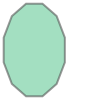

In [24]:
# create an approximated circle thanks to a polygon of 12 points
c = []
nb_points = 12
for az in range(nb_points):
    point = geod.Direct(p12_lat, p12_lon, 45 + (az*360/nb_points), 750)
    print(point)
    c.append((point['lat2'],point['lon2']))
shape_cercle = Polygon(c)
shape_cercle